In [1]:
import os

In [2]:
pwd

'C:\\Users\\chand\\Desktop\\Projects\\ABIDE_Data_Access'

In [3]:
os.chdir(r"CMU_a")

In [4]:
pwd

'C:\\Users\\chand\\Desktop\\Projects\\ABIDE_Data_Access\\CMU_a'

In [5]:
import pandas as pd
df = pd.read_csv("phenotypic_CMU (1).csv")

In [6]:
df.head()

,SITE_ID,SUB_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,FIQ,VIQ,...,WISC_IV_BLK_DSN_SCALED,WISC_IV_PIC_CON_SCALED,WISC_IV_MATRIX_SCALED,WISC_IV_DIGIT_SPAN_SCALED,WISC_IV_LET_NUM_SCALED,WISC_IV_CODING_SCALED,WISC_IV_SYM_SCALED,EYE_STATUS_AT_SCAN,AGE_AT_MPRAGE,BMI
0,CMU,50642,1,1,33,1,R,NaN,103,98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
1,CMU,50643,1,1,21,1,R,NaN,123,112,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
2,CMU,50644,1,1,19,2,R,NaN,107,110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
3,CMU,50645,1,1,20,1,R,NaN,124,128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
4,CMU,50646,1,1,21,1,R,NaN,108,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN


In [7]:
def getlableWithID(num):
    for  index,i in enumerate(df['SUB_ID']):
        if num ==  i:
            return df.iloc[index]['DX_GROUP'],i

In [8]:
a,b = getlableWithID(50642)
type(a),type(b)
a,b

(1, 50642)

In [9]:
def imageDownload(path,num):
    import nibabel as nib
    import matplotlib.pyplot as plt

    # Replace 'path/to/your/nifti_file.nii.gz' with the actual path to your NIfTI file
    nifti_img = nib.load(path)
    nifti_data = nifti_img.get_fdata()

    # Select the slice you want to visualize (e.g., the middle slice along the third dimension)
    middle_slice = nifti_data.shape[2] // 2
    import os
    os.makedirs(f"autism",exist_ok=True)
    os.makedirs(f"non-autism",exist_ok=True)
    a,b = getlableWithID(num)
    if a == 1:
        # Display the selected slice using matplotlib
        plt.imshow(nifti_data[:, :, middle_slice], cmap='BrBG')
        # plt.title('NIfTI Slice')
        # plt.imshow(nifti_data[:, :, middle_slice][85:410,190:475], cmap='BrBG')
        plt.axis("off")
        plt.savefig(f'autism/{str(b)}.png',dpi = 100)  # Save the plot as an image file
        # plt.show()
    else:
        plt.imshow(nifti_data[:, :, middle_slice], cmap='BrBG')
        # plt.title('NIfTI Slice')
        # plt.imshow(nifti_data[:, :, middle_slice][85:410,190:475], cmap='BrBG')
        plt.axis("off")
        plt.savefig(f'non-autism/{str(b)}.png',dpi = 100)  # Save the plot as an image file
        # plt.show()
        
        

1 50642
1 50646
1 50647
1 50649
1 50653
1 50654
2 50656
2 50659
2 50660
2 50663
2 50664
2 50665
2 50666
2 50668


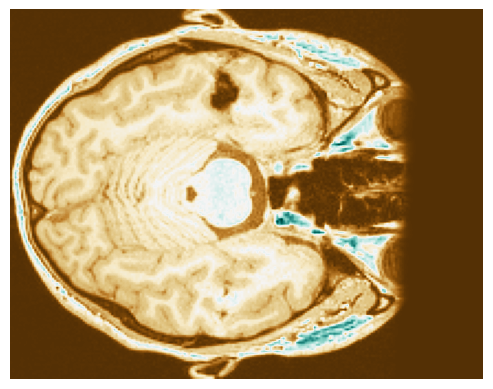

In [10]:
for i in os.listdir("."):
    if i == "phenotypic_CMU (1).csv":
        continue
    for j in os.listdir(i):
        # print(type(j))
        for k in os.listdir(os.path.join(i,j)):
            for l in os.listdir(os.path.join(i,j,k)):
                if "rest" in l:
                    continue
                for m in os.listdir(os.path.join(i,j,k,l)):
                    z1,z2 = getlableWithID(int(j[2:]))
                    imageDownload(os.path.join(i,j,k,l,m),z2)
                    print(z1,z2)

In [16]:
import cv2
img = cv2.imread(r"C:\Users\chand\Desktop\Projects\abide\KKI\autism\50804.png")

In [17]:
img.shape

(480, 640, 3)

In [18]:
import matplotlib.pyplot as plt

(-0.5, 284.5, 324.5, -0.5)

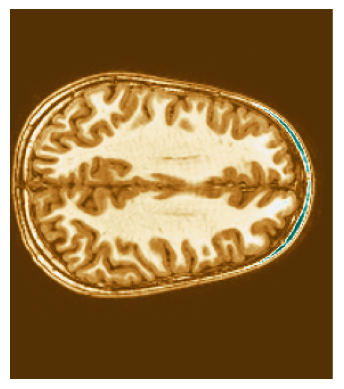

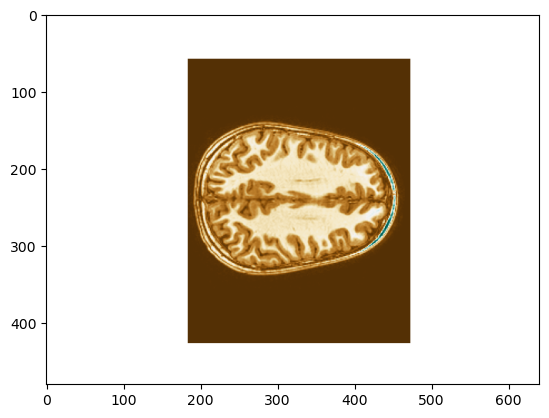

In [21]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [22]:
img.shape

(480, 640, 3)

In [ ]:
python download_abide_preproc.py -o . -d reho -p cpac -s nofilt_noglobal